In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2025-03-29 10:26:13--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.128.207, 74.125.143.207, 173.194.69.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.128.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.3’

10_food_classes_10_ 100%[===================>] 160.74M  39.6MB/s    in 4.7s    

2025-03-29 10:26:18 (34.5 MB/s) - ‘10_food_classes_10_percent.zip.3’ saved [168546183/168546183]



In [ ]:
with zipfile.ZipFile('/content/10_food_classes_10_percent.zip') as zip_ref:
  zip_ref.extractall()

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

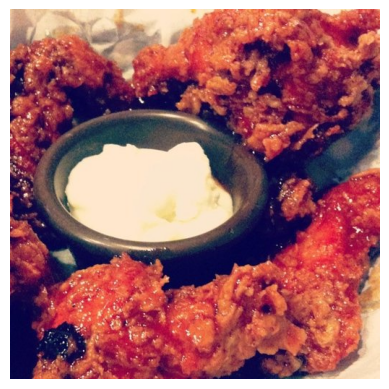

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/10_food_classes_10_percent/train/chicken_wings/1022742.jpg')
imgplot = plt.imshow(img)
plt.axis(False)

In [ ]:
import os
for(dirpath, dirnames, filenames) in os.walk('/content/10_food_classes_10_percent'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

There are 2 directories and 0 images in /content/10_food_classes_10_percent
There are 10 directories and 0 images in /content/10_food_classes_10_percent/test
There are 0 directories and 250 images in /content/10_food_classes_10_percent/test/pizza
There are 0 directories and 250 images in /content/10_food_classes_10_percent/test/steak
There are 0 directories and 250 images in /content/10_food_classes_10_percent/test/fried_rice
There are 0 directories and 250 images in /content/10_food_classes_10_percent/test/hamburger
There are 0 directories and 250 images in /content/10_food_classes_10_percent/test/chicken_curry
There are 0 directories and 250 images in /content/10_food_classes_10_percent/test/ice_cream
There are 0 directories and 250 images in /content/10_food_classes_10_percent/test/ramen
There are 0 directories and 250 images in /content/10_food_classes_10_percent/test/grilled_salmon
There are 0 directories and 250 images in /content/10_food_classes_10_percent/test/sushi
There are 0

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "/content/10_food_classes_10_percent/train/"
test_dir = "/content/10_food_classes_10_percent/test/"

train_datagen = ImageDataGenerator(rescale= 1./255)
test_datagen = ImageDataGenerator(rescale= 1./255)

train_data_10_percent = train_datagen.flow_from_directory(directory = train_dir,
                                                          target_size = (224, 224),
                                                          batch_size = 32,
                                                          class_mode = 'categorical')
test_data_10_percent = test_datagen.flow_from_directory(directory = test_dir,
                                                        target_size = (224, 224),
                                                        batch_size = 32,
                                                        class_mode = 'categorical')

Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


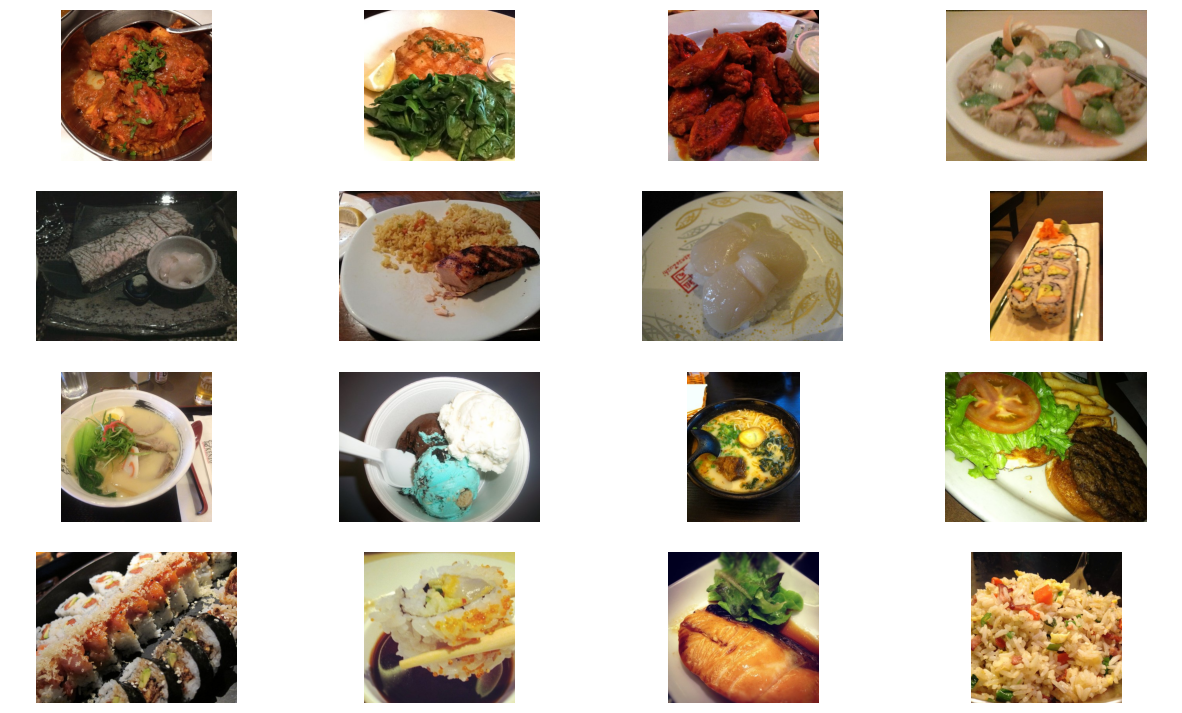

In [ ]:
import random
from PIL import Image

images = []
for folder in os.listdir(train_dir):
  for image in os.listdir(train_dir + '/' + folder):
    images.append(os.path.join(train_dir, folder, image))


plt.figure(1, figsize = (15, 9))
plt.axis('off')
n = 0
for i in range(16):
  n += 1
  random_img = random.choice(images)
  imgs = mpimg.imread(random_img)
  plt.subplot(4, 4, n)
  plt.axis('off')
  plt.imshow(imgs)

plt.show()

In [ ]:
resnet_url = "https://www.kaggle.com/models/google/resnet-v2/TensorFlow2/50-feature-vector/2"
efficientnet_url = "https:/www.kaggle.com/models/tensorflow/efficientnet/TensorFlow2/b0-feature-vector/1"

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
IMAGE_SHAPE = (224, 224)

In [ ]:
!pip install tensorflow_hub

In [ ]:
def create_model(model_url, num_classes = 10):
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable = False,
                                           name = 'Feature_extraction_layer',
                                           input_shape = IMAGE_SHAPE + (3, ))
  model = tf.keras.Sequential([
      tf.keras.layers.Lambda(lambda x: feature_extractor_layer(x)),
      tf.keras.layers.Dense(num_classes, activation = 'softmax', name = 'output_layer')
  ])
  return model

In [ ]:
resnet_model = create_model(resnet_url, num_classes = 10)

In [ ]:
train_data_10_percent.num_classes

10

In [ ]:
resnet_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lambda (Lambda)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
resnet_model.weights

[]

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3)
resnet_model.compile(loss = 'categorical_crossentropy',
                     optimizer = optimizer,
                     metrics = ['accuracy'])

In [ ]:
resnet_history = resnet_model.fit(train_data_10_percent,
                 batch_size=8,
                 epochs=5,
                 steps_per_epoch=len(train_data_10_percent),
                 validation_data=(test_data_10_percent),
                 validation_steps=len(test_data_10_percent))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
10/24 ━━━━━━━━━━━━━━━━━━━━ 25:16 108s/step - accuracy: 0.1788 - loss: 2.4992

InternalError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start

  File "/usr/local/lib/python3.11/dist-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.11/asyncio/base_events.py", line 608, in run_forever

  File "/usr/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once

  File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 499, in process_one

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 730, in execute_request

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py", line 383, in do_execute

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/zmqshell.py", line 528, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-17-a20a77ba7599>", line 1, in <cell line: 0>

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 371, in fit

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 219, in function

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 132, in multi_step_on_iterator

Failed to allocate 102760448 bytes for new constant
	 [[{{node StatefulPartitionedCall}}]] [Op:__inference_multi_step_on_iterator_19213]

In [ ]:
resnet_model.evaluate(test_data_10_percent)

In [ ]:
resnet_model.layers

In [ ]:
resnet_model.layers[0]

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
def plot_loss_curve(history):
  loss = history.history['loss']
  vall_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_acccuracy']
  epochs = range(len(history.history['val_accuracy']))
  #plot loss
  plt.plot(epochs, loss, label = 'training_loss')
  plt.plot(epochs, val_loss, label = 'val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label = '')
  plt.plot(epochs, val_accuracy, label = '')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend()

In [ ]:
plot_loss_curve(resnet_history)

In [ ]:
efficientrel_model = create_model(efficientrel_url,
                                  train_data_10_percent.num_classes)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3)
efficientrel_model.compile(loss = 'categorical_crossentropy',
                           optimizer = optimizer,
                           metrics = ['accuracy'])

In [ ]:
efficientrel_history = efficientrel_model.fit(train_data_10_percent,
                       epochs=5,
                       steps_per_epoch=len(train_data_10_percent),
                       validation_data=test_data_10_percent,
                       validation_steps=len(test_data_10_percent))


In [ ]:
plot_loss_curve(efficientrel_history)

In [ ]:
efficientnetrel_model.evaluate(test_data_10_percent)

#100% Dataa

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

import zipfile
zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip', 'r')
zip_ref.extractall()
zip_ref.close()

import os
for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.')

In [ ]:
train_dir = '/content/10_food_classes_all_data/train'
test_dir = '/content/10_food_classes_all_data/test'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_datagen.flow_from_directory(directory = train_dir,
                                  target_size = (224, 224),
                                  batch_size = 32,)
test_datagen.flow_from_directory(directory = test_dir,
                                  target_size = (224, 224),
                                  batch_size = 32,)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

In [ ]:
efficientrel_history = efficientrel_model.fit(train_data_full,
                                              epochs=5,
                                              steps_per_epoch=len(train_data_full),
                                              validation_data=test_data_full,
                                              validation_steps=len(test_data_full))

In [ ]:
efficientrel_model.evaluate(test_data_full)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate 1e-3)
resnet_model.compile(loss = 'categorical_crossentropy',
                     optimizer = optimizer,
                     metrics = ['accuracy'])

In [ ]:
resnet_history = resnet_model.fit(train_data_full,
                                  epochs = 5,
                                  steps_per_epoch = len(train_data_full),
                                  validation_data = test_data_full,
                                  validation_steps = len(test_data_full))

In [ ]:
plot_loss_curve(resnet_history)

In [ ]:
resnet_model.evaluate(test_data_full)